In [3]:
pip install -U wbdata

Note: you may need to restart the kernel to use updated packages.


In [5]:
import wbdata

In [7]:
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [9]:
help(wbdata)

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    c:\users\51964\anaconda3\lib\site-packages\wbdata\__init__.py




In [11]:
import wbdata

In [13]:
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [17]:
wbdata.get_indicators(source=25)

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------
BM.KLT.DINV.WD.GD.ZS  Foreign direct investment, net outflows (% of GDP)
BM.TRF.PWKR.CD.DT     Personal remittances, paid (current US$)
BX.KLT.DINV.WD.GD.ZS  Foreign direct investment, net inflows (% of GDP)
BX.TRF.PWKR.CD        Personal transfers, receipts (BoP, current US$)
CM.MKT.LCAP.GD.ZS     Market capitalization of listed domestic companies (% of GDP)
EG.ELC.ACCS.ZS        Access to electricity (% of population)
EG.USE.ELEC.KH.PC     Electric power consumption (kWh per capita)
EN.POP.DNST           Population density (people per sq. km of land area)
FB.ATM.TOTL.P5        Automated teller machines (ATMs) (per 100,000 adults)
FB.CBK.BRWR.P3        Borrowers from commercial banks (per 1,000 adults)
FP.CPI.TOTL           Consumer price index (2010 = 100)
FP.CPI.TOTL.ZG        Inflation, consumer prices (annual %)
FS.AST.DO

In [19]:
indicadores = {'SP.RUR.TOTL':'Rural_population', 'SP.URB.TOTL':'Urban_population'}
#SP.RUR.TOTL                  Rural population
#SP.URB.TOTL                  Urban population

import wbdata

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])
df = data

df.head()

Rural_population  Urban_population
country   date                                    
Argentina 2023         3432229.0        42106172.0
          2022         3475067.0        41932837.0
          2021         3521217.0        41791064.0
          2020         3565194.0        41626771.0
          2019         3601925.0        41371540.0

In [21]:
df

Rural_population  Urban_population
country       date                                    
Argentina     2023         3432229.0        42106172.0
              2022         3475067.0        41932837.0
              2021         3521217.0        41791064.0
              2020         3565194.0        41626771.0
              2019         3601925.0        41371540.0
...                              ...               ...
United States 1964        54673014.0       137215986.0
              1963        54626596.0       134615404.0
              1962        54549307.0       131988693.0
              1961        54414785.0       129276215.0
              1960        54208527.0       126462473.0

[128 rows x 2 columns]

In [25]:
df.reset_index(inplace=True)

,country,date,Rural_population,Urban_population
0,Argentina,2023,3432229.0,42106172.0
1,Argentina,2022,3475067.0,41932837.0
2,Argentina,2021,3521217.0,41791064.0
3,Argentina,2020,3565194.0,41626771.0
4,Argentina,2019,3601925.0,41371540.0
...,...,...,...,...
123,United States,1964,54673014.0,137215986.0
124,United States,1963,54626596.0,134615404.0
125,United States,1962,54549307.0,131988693.0
126,United States,1961,54414785.0,129276215.0


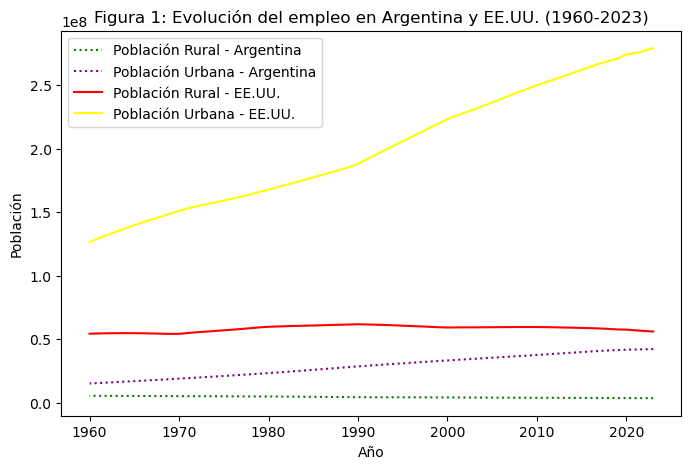

In [93]:
# Estilo pyplot
# Filtramos los datos de Argentina y EE.UU.
df_filtered = df[df["country"].isin(["Argentina", "United States"])].copy()

# Convertimos la columna "date" a tipo numérico
df_filtered["date"] = df_filtered["date"].astype(int)

# Escogemos el periodo de tiempo (1960-2023)
df_filtered = df_filtered[df_filtered["date"] >= 1960]

# Separar los datos por país
df_arg = df_filtered[df_filtered["country"] == "Argentina"]
df_usa = df_filtered[df_filtered["country"] == "United States"]

# Crear gráfico con estilo Pyplot
plt.figure(figsize=(8, 5))

# Grafico Argentina
plt.plot(df_arg["date"], df_arg["Rural_population"], label="Población Rural - Argentina", color="green", linestyle="dotted")
plt.plot(df_arg["date"], df_arg["Urban_population"], label="Población Urbana - Argentina", color="purple", linestyle="dotted")

# Grafico EE.UU.
plt.plot(df_usa["date"], df_usa["Rural_population"], label="Población Rural - EE.UU.", color="red")
plt.plot(df_usa["date"], df_usa["Urban_population"], label="Población Urbana - EE.UU.", color="yellow")

# Labels
plt.xlabel("Año")
plt.ylabel("Población")
plt.title("Figura 1: Evolución del empleo en Argentina y EE.UU. (1960-2023)")

# Agrego leyenda
plt.legend()
plt.show()

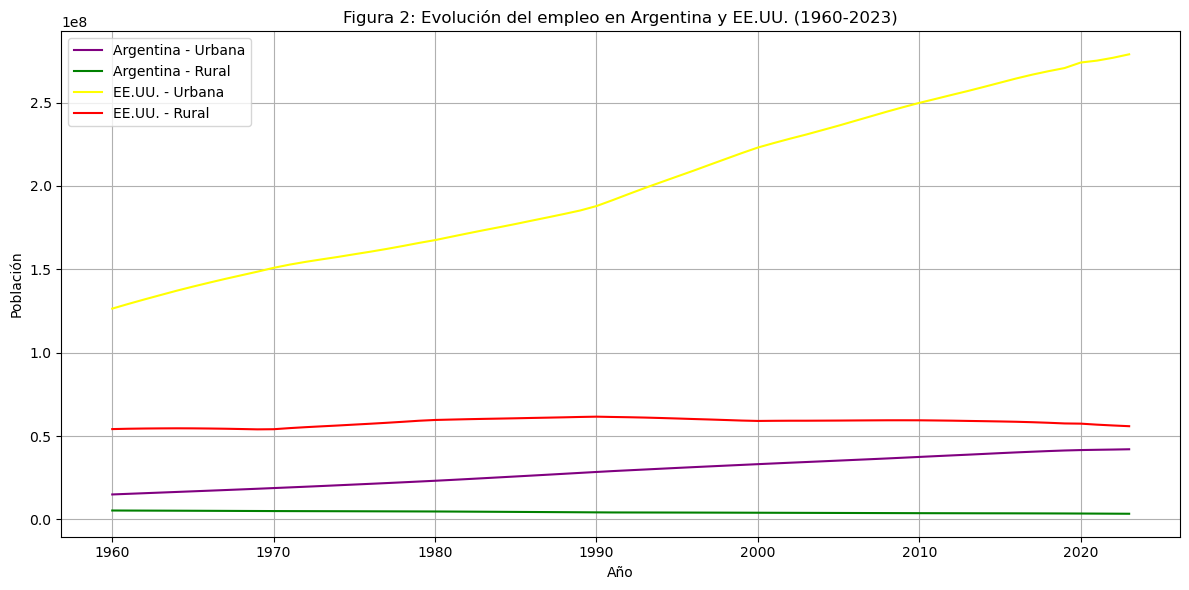

In [95]:
# Estilo orientado a objetos
fig, ax = plt.subplots(figsize=(12, 6))

# Argentina
ax.plot(df_arg["date"], df_arg["Urban_population"], label="Argentina - Urbana", color="purple")
ax.plot(df_arg["date"], df_arg["Rural_population"], label="Argentina - Rural", color="green")

# EE.UU.
ax.plot(df_usa["date"], df_usa["Urban_population"], label="EE.UU. - Urbana", color="yellow")
ax.plot(df_usa["date"], df_usa["Rural_population"], label="EE.UU. - Rural", color="red")

# Configuración del gráfico
ax.set_xlabel("Año")
ax.set_ylabel("Población")
ax.set_title("Figura 2: Evolución del empleo en Argentina y EE.UU. (1960-2023)")

# Agrego la leyenda
ax.legend()
ax.grid(True)
fig.tight_layout()
plt.show()